<a href="https://colab.research.google.com/github/Shivam1603/machine-learning-concepts/blob/main/playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
# Standard Stuff
import numpy as np
import matplotlib.pyplot as plt

# Keras Magic
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import smart_resize
from tensorflow.keras.applications import ResNet50

# sklearn BS
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score

# Import these standard models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

CNN basic

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
x_train = x_train/255
x_test = x_test/255

x_train = np.stack([x_train]*3, axis = -1)
x_test = np.stack([x_test]*3, axis = -1)

In [18]:
x_train.shape

(60000, 28, 28, 3)

In [21]:
#build the model
model = Sequential()
model.add(Conv2D(32, 3, activation = 'relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [22]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
model.fit(x_train, to_categorical(y_train), epochs = 10, validation_data = (x_test, to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.1974 - accuracy: 0.9420 - val_loss: 0.1097 - val_accuracy: 0.9682
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0701 - accuracy: 0.9786 - val_loss: 0.0662 - val_accuracy: 0.9781
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0481 - accuracy: 0.9846 - val_loss: 0.0543 - val_accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0355 - accuracy: 0.9892 - val_loss: 0.0634 - val_accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0289 - accuracy: 0.9908 - val_loss: 0.0573 - val_accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0216 - accuracy: 0.9928 - val_loss: 0.0552 - val_accuracy: 0.9831
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0174 - accuracy: 0.9941 - val_loss: 0.0587 - val_accuracy

In [25]:
 np.argmax(model.predict(x_test[:1]))

1/1 [==============================] - 0s 25ms/step


7

CNN Transfer Learning

In [27]:
# preprocess the input

x_train = np.array([smart_resize(x, (32, 32)) for x in x_train])
x_test = np.array([smart_resize(x, (32, 32)) for x in x_test])

In [33]:
base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))

for layer in base_model.layers:
  layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [34]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [35]:
model.fit(x_train, to_categorical(y_train), epochs = 10, validation_data = (x_test, to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 29s 13ms/step - loss: 0.7988 - accuracy: 0.7579 - val_loss: 0.4270 - val_accuracy: 0.8739
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3911 - accuracy: 0.8810 - val_loss: 0.3067 - val_accuracy: 0.9049
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3237 - accuracy: 0.8996 - val_loss: 0.2950 - val_accuracy: 0.9059
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2893 - accuracy: 0.9097 - val_loss: 0.2411 - val_accuracy: 0.9262
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2692 - accuracy: 0.9158 - val_loss: 0.2293 - val_accuracy: 0.9295
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2541 - accuracy: 0.9189 - val_loss: 0.2123 - val_accuracy: 0.9345
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2421 - accuracy: 0.9236 - val_loss: 0.1930 -

In [32]:
x_train.shape

(60000, 32, 32, 3)

Log Reg using Keras

In [39]:
data = load_breast_cancer()

In [41]:
x, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [43]:
lr_clf = Sequential([Dense(1, activation = 'sigmoid')])

In [47]:
lr_clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [48]:
history = lr_clf.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test))

Epoch 1/50
13/13 [==============================] - 1s 17ms/step - loss: 0.2062 - accuracy: 0.8970 - val_loss: 0.1140 - val_accuracy: 0.9591
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1787 - accuracy: 0.9221 - val_loss: 0.1019 - val_accuracy: 0.9591
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1563 - accuracy: 0.9347 - val_loss: 0.0912 - val_accuracy: 0.9766
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1535 - accuracy: 0.9372 - val_loss: 0.1013 - val_accuracy: 0.9591
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.0934 - val_accuracy: 0.9708
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1636 - accuracy: 0.9271 - val_loss: 0.1021 - val_accuracy: 0.9708
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1438 - accuracy: 0.9347 - val_loss: 0.0957 - val_accuracy: 0.9649
Epoch 8/50
13/13 [=

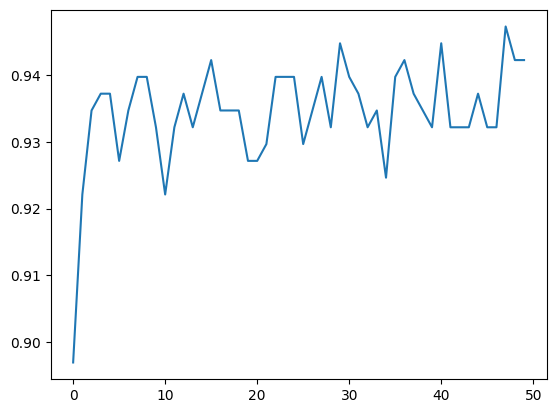

In [51]:
plt.plot(history.history['accuracy'])

Applying Multiple ML algos below:
1. Logistic Regression
2. Decision Trees
3. SVM
4. XGBoost
5. RandomForestClassifier

In [53]:
def apply_algo(model, x_train, y_train, x_test):
  model.fit(x_train, y_train)
  return model.predict(x_test)

In [59]:
for model in [LogisticRegression(), DecisionTreeClassifier(), SVC(), XGBClassifier(n_estimators = 100), RandomForestClassifier(n_estimators = 100)]:
  y_pred = apply_algo(model, x_train, y_train, x_test)
  print(str(model), accuracy_score(y_pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() 0.9707602339181286
DecisionTreeClassifier() 0.935672514619883
SVC() 0.935672514619883
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) 0.9707602339181286
RandomForestClassifier() 0.9707602339181286


K-Fold Cross Validation:
This is important to judge the performance of a model across different types of test sets. We divide the entire dataset into k folds and we do the following for each fold:
1. Make that fold as the test set and the combined remaining folds as the training set
2. Find the score of the test set once the model is trained on the training set

Once done, we print out all the k scores, we can even take the mean to judge multiple models.

In [63]:
def scorer(model, x, y):
  y_pred = model.predict(x)
  return f1_score(y_pred, y)

In [65]:
for model in [LogisticRegression(), DecisionTreeClassifier(), SVC(), XGBClassifier(n_estimators = 100), RandomForestClassifier(n_estimators = 100)]:
  cv_score = cross_val_score(model, x, y, scoring = scorer, cv = 5)
  print(str(model), np.mean(cv_score))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression() 0.9556914964057821
DecisionTreeClassifier() 0.9305367589670777
SVC() 0.9339140018560181
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) 0.9762943362967486
RandomForestClassifier() 0.9735143669948183


Linear Regression using Keras

In [106]:
from tensorflow.keras import optimizers

x = []
y = []

for i in range(1000):
  x.append([i])
  y.append(10*i)

x = np.array(x)
y = np.array(y)


lr = Sequential([Dense(1, activation = 'linear')])

In [109]:
lr.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

In [111]:
lr.fit(x, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0014 - mae: 0.0317
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0014 - mae: 0.0314
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0014 - mae: 0.0307
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0013 - mae: 0.0303
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0013 - mae: 0.0297
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0012 - mae: 0.0294
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0012 - mae: 0.0289
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0012 - mae: 0.0284
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0011 - mae: 0.0280
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0011 - mae: 0.0275
Epoch 11/100
32/32 [==============================] - 0s 4m

In [136]:
lr.predict([8.41])

1/1 [==============================] - 0s 35ms/step


array([[80.001816]], dtype=float32)

In [121]:
w, b = lr.get_weights()

In [127]:
8.4 * w[0][0] + b[0]

84.00181550784036

In [126]:
b[0]

0.0018395404